In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import *
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import *

# Problem 1

## Linear Regression

In [5]:
data=pd.read_excel('compactiv.xlsx')
data.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [6]:
data.tail()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[5 rows x 22 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [8]:
data.shape

(8192, 22)

In [9]:
data.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

In [10]:
data.dtypes

lread         int64
lwrite        int64
scall         int64
sread         int64
swrite        int64
fork        float64
exec        float64
rchar       float64
wchar       float64
pgout       float64
ppgout      float64
pgfree      float64
pgscan      float64
atch        float64
pgin        float64
ppgin       float64
pflt        float64
vflt        float64
runqsz       object
freemem       int64
freeswap      int64
usr           int64
dtype: object

In [11]:
data.duplicated().sum()

0

In [12]:
data.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

Bivariate Analysis to understand the correlation within the variables

<Figure size 1440x1440 with 0 Axes>

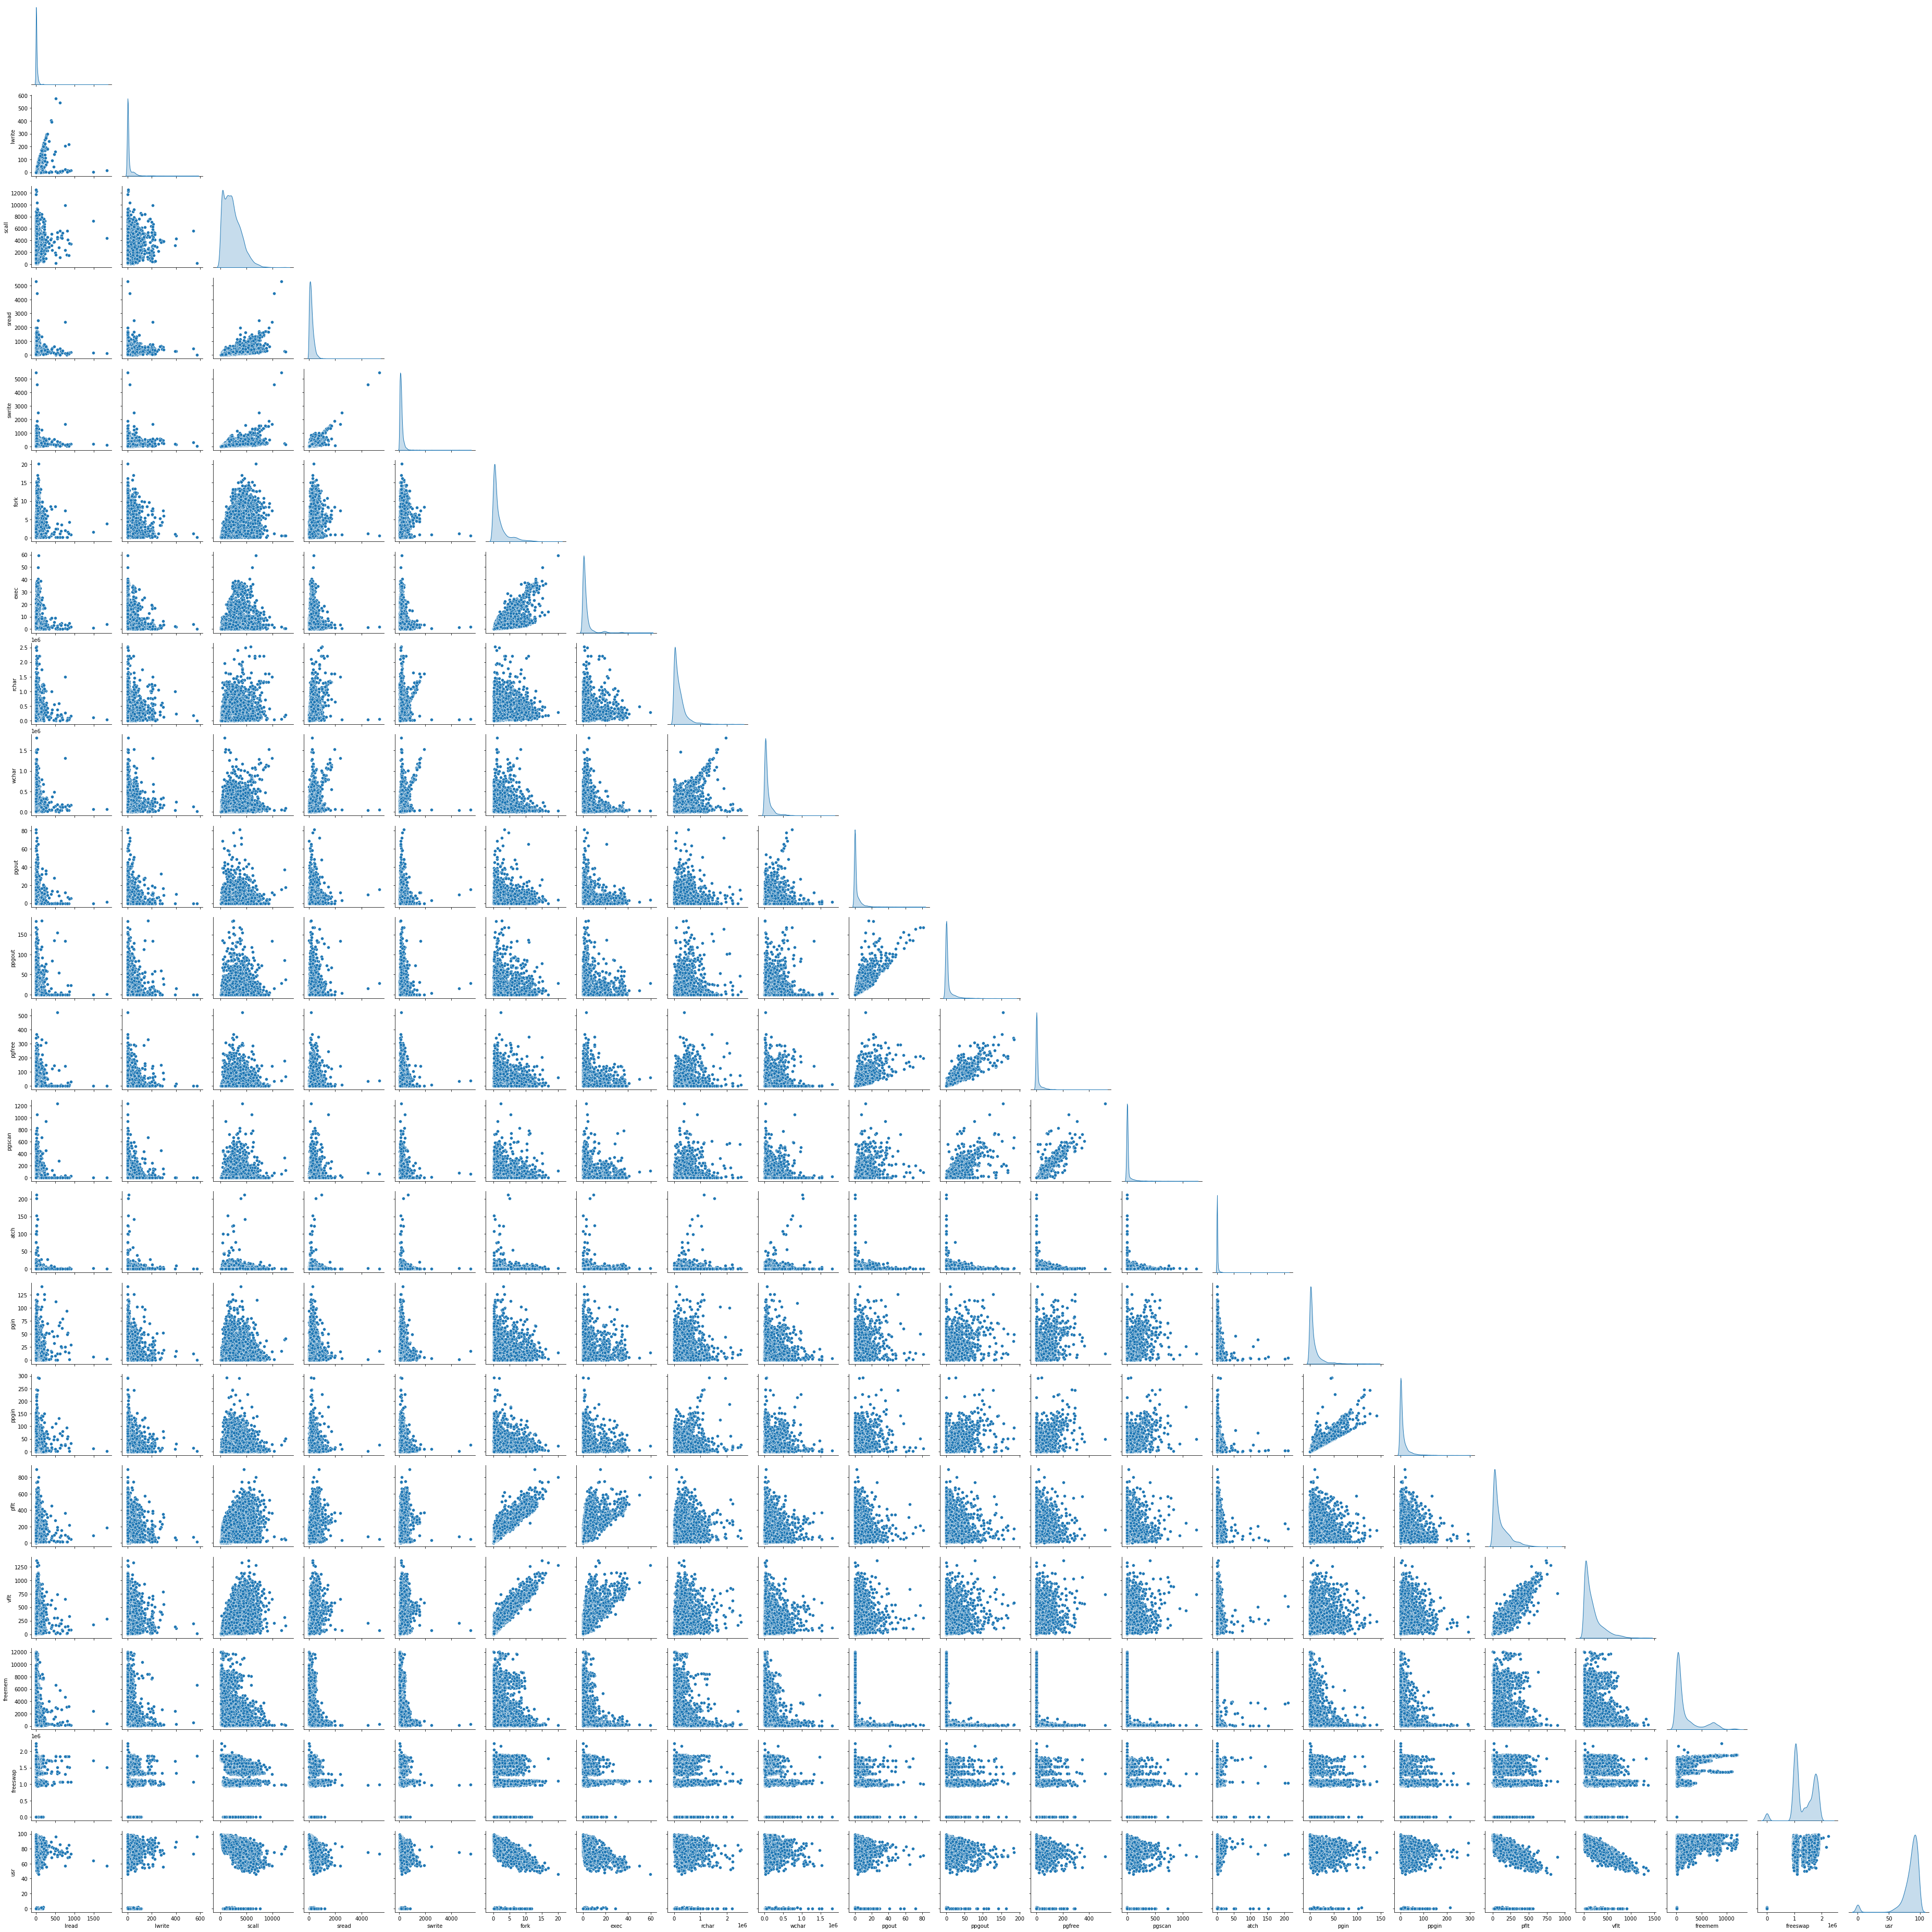

In [13]:
plt.figure(figsize=(20,20))
sns.pairplot(data=data,diag_kind='kde', corner=True );

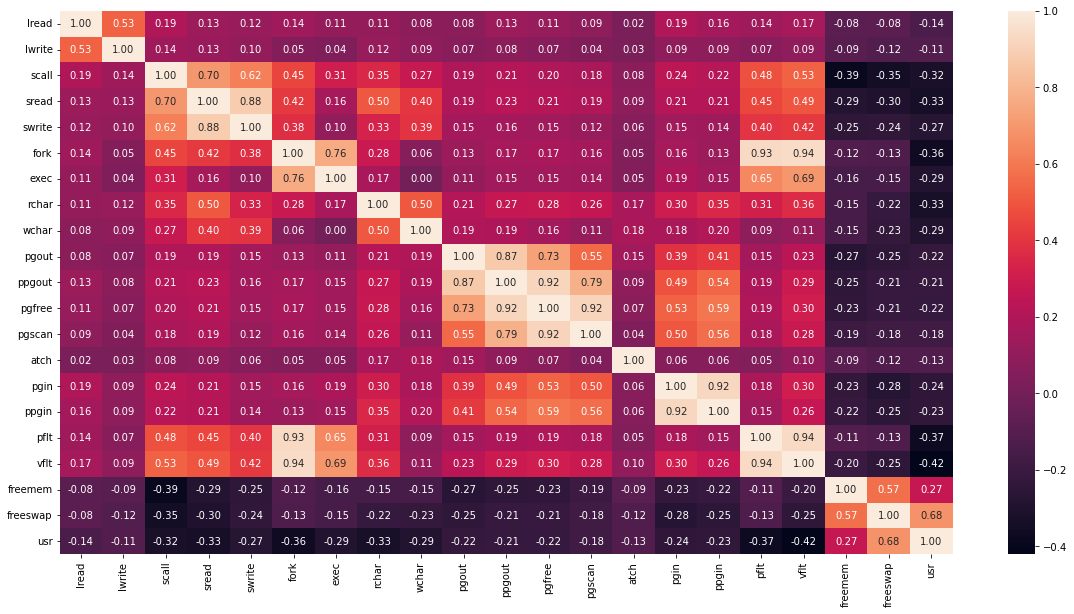

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f');

In [15]:
#Lets now drop the runqsz and pgscan column and treat the missing values and create a new dataframe for the same

In [16]:
df=data.drop(['runqsz', 'pgscan'], axis=1)
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ppgout  pgfree  atch  pgin  ppgin    pflt    vflt  freemem  freeswap  usr  
0     0.0     0.0   0.0   1.6    2.6   16.00   26.40     4670   1730946   95  
1     0.0     0.0   0.0   0.0    0.0   15.63   16.83     7278   1869002   97  
2     0.0     0.0   1.2   6.0    9.4  150.20  220.20      702   1021237   87  
3     0.0     0.0   0.0   0.2    0.2   15.60   16.80     7248   1863704   98  
4     0.0     0.0   0.0   1.0    1.2   37.80   47.60      633   1760253   90

In [17]:
df['rchar'].fillna(df['rchar'].median(), inplace=True)

In [18]:
df['wchar'].fillna(df['wchar'].median(), inplace=True)

In [19]:
df.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
freemem     0
freeswap    0
usr         0
dtype: int64

In [20]:
(data == 0).sum()

lread        675
lwrite      2684
scall          0
sread          0
swrite         0
fork          21
exec          21
rchar          0
wchar          0
pgout       4878
ppgout      4878
pgfree      4869
pgscan      6448
atch        4575
pgin        1220
ppgin       1220
pflt           3
vflt           0
runqsz         0
freemem        0
freeswap       0
usr          283
dtype: int64

In [21]:
data.loc[~(data==0).all(axis=1)]

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
0         1       0   2147     79      68   0.2  0.20   40671.0  53995.0   
1         0       0    170     18      21   0.2  0.20     448.0   8385.0   
2        15       3   2162    159     119   2.0  2.40       NaN  31950.0   
3         0       0    160     12      16   0.2  0.20       NaN   8670.0   
4         5       1    330     39      38   0.4  0.40       NaN  12185.0   
...     ...     ...    ...    ...     ...   ...   ...       ...      ...   
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
0      0.00  ...    0.00   0.0   1.60   2.60   16.00   26.40      CPU_Bound   
1      0.00  ...    0.00   0.0   0.00   0.00   15.63   16.83  Not_CPU_Bound   
2      0.00  ...    0.00   1.2   6.00   9.40  150.20  220.20  Not_CPU_Bound   
3      0.00  ...    0.00   0.0   0.20   0.20   15.60   16.80  Not_CPU_Bound   
4      0.00  ...    0.00   0.0   1.00   1.20   37.80   47.60  Not_CPU_Bound   
...     ...  ...     ...   ...    ...    ...     ...     ...            ...   
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
0        4670  1730946   95  
1        7278  1869002   97  
2         702  1021237   87  
3        7248  1863704   98  
4         633  1760253   90  
...       ...      ...  ...  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[8192 rows x 22 columns]

Checking for the outliers

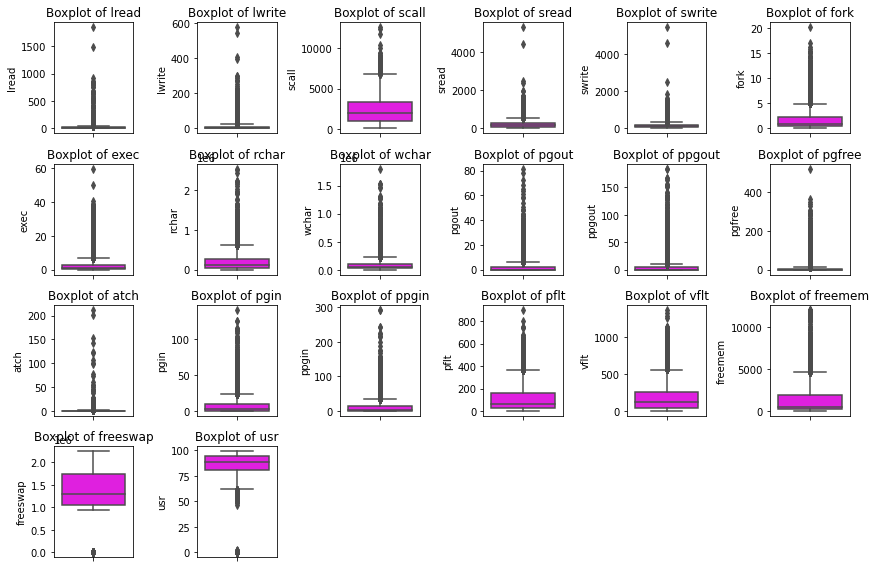

In [22]:
plt.figure(figsize = (12,8))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(4, 6, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df, color='magenta')
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [23]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [24]:
for i in feature_list:
    LR, UR = remove_outlier(df[i])
    df[i] = np.where(df[i] > UR, UR, df[i])
    df[i] = np.where(df[i] < LR, LR, df[i])

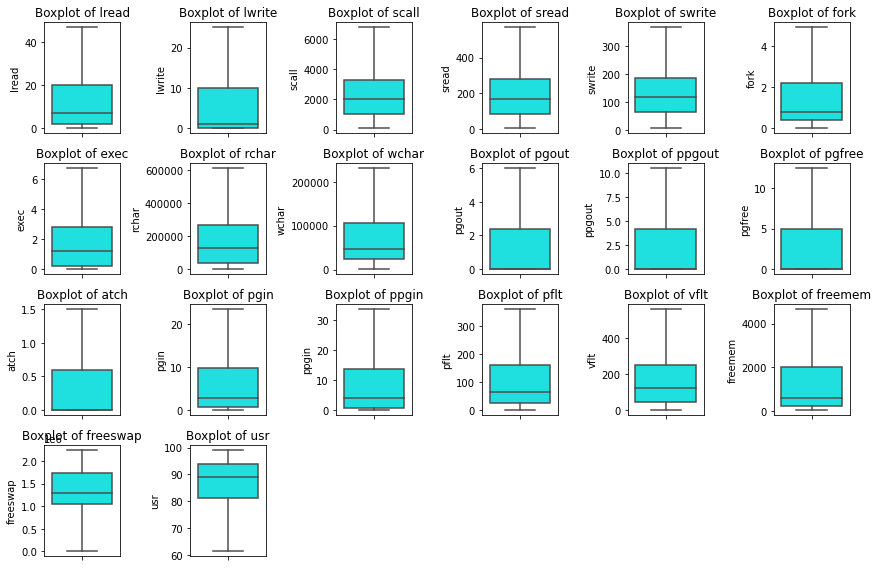

In [42]:
plt.figure(figsize = (12,8))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(4, 6, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df, color='cyan')
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

Splitting the Data

In [43]:
# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
#Independent Variables
X=df.drop(["usr"], axis=1)
#Dependent Variable
Y=df[["usr"]]

In [45]:
#Adding intercept to that data
X=sm.add_constant(X)

In [46]:
#Splitting the data into  train and test sets in a 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [47]:
print(X_train.head())

      const  lread  lwrite   scall  sread  swrite  fork  exec     rchar  \
694     1.0    1.0     1.0  1345.0  223.0   192.0   0.6   0.6  198703.0   
5535    1.0    1.0     1.0  1429.0   87.0    67.0   0.2   0.2    7163.0   
4244    1.0   47.0    25.0  3273.0  225.0   180.0   0.6   0.4   83246.0   
2472    1.0   13.0     8.0  4349.0  300.0   191.0   2.8   3.0   96009.0   
7052    1.0   17.0    23.0   225.0   13.0    13.0   0.4   1.6   17132.0   

           wchar  pgout  ppgout  pgfree  atch  pgin  ppgin    pflt    vflt  \
694   230625.875   0.60    6.20   12.50   1.5  3.80   7.40   28.20   56.60   
5535   24842.000   0.00    0.00    0.00   0.0  1.60   1.60   15.77   30.74   
4244   53705.000   5.39    7.19    7.19   1.5  3.99   4.59   59.88   74.05   
2472   70467.000   0.00    0.00    0.00   0.0  2.80   3.20  129.00  236.80   
7052   12514.000   0.00    0.00    0.00   0.0  0.00   0.00   19.80   23.80   

      freemem   freeswap  
694     121.0  1375446.0  
5535   1476.0  1021541.0  

In [48]:
print(X_test.head())

      const  lread  lwrite   scall  sread  swrite  fork  exec     rchar  \
3894    1.0   27.0    25.0  1252.0   53.0   118.0   0.2   0.2   26592.0   
4276    1.0    1.0     0.0   996.0   85.0    55.0   0.4   0.4   16667.0   
3414    1.0    9.0     7.0  1530.0  247.0   135.0   0.4   0.4   14513.0   
4165    1.0   32.0     4.0  3243.0  182.0   140.0   4.9   5.6  337517.0   
7385    1.0   16.0     3.0  5017.0  259.0   249.0   2.8   1.4   73537.0   

           wchar  pgout  ppgout  pgfree  atch  pgin  ppgin    pflt    vflt  \
3894   54394.000    0.0     0.0     0.0   0.0   0.4    0.6   19.44   20.04   
4276   36431.000    0.0     0.0     0.0   0.0   1.0    1.4   35.53   52.10   
3414   61905.000    6.0    10.5    12.5   1.5  14.8   18.4   26.80  186.20   
4165   94832.000    0.8     1.0     1.0   1.4   4.6    7.0  250.60  420.20   
7385  230625.875    0.0     0.0     0.0   0.0   5.6    5.8  142.80  276.20   

       freemem   freeswap  
3894  4659.125  1875466.0  
4276  2979.000  1010114.

Fit Linear Model

In [49]:
olsmod = sm.OLS(Y_train, X_train)
olsres = olsmod.fit()

In [50]:
# Let's look into the regression summary
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     1133.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:27:26   Log-Likelihood:                -16738.
No. Observations:                5734   AIC:                         3.352e+04
Df Residuals:                    5714   BIC:                         3.365e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.5495      0.300    285.117      0.0

### Interpretation of R-squared
The R-squared value tells us that our model can explain 79% of the variance in the training set.

### Interpretation of Coefficients

* The coefficients tell us how one unit change in X can affect Y.

* The sign of the coefficient indicates if the relationship is positive or negative.

* Earlier we saw that the relationship of mpg with displacement, horsepower and weight is almost the same (as mpg increases, the variable decreases and vice versa). This suggests that all the 3 factors have similar effect on mpg, i.e., the increase in either of the 3 decreases mpg. Therefore, the signs of the coefficents should be the same. But we observe that it is not so. This indicates the presence of multicollinearity in our data.

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent.  If the collinearity between variables is high, we might not be able to trust the p-values to identify independent variables that are statistically significant.

* When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

### Interpretation of p-values (P > |t|)

* For each predictor variable there is a null hypothesis and alternate hypothesis.


    - Null hypothesis : Predictor variable is not significant 
    - Alternate hypothesis : Predictor variable is significant


* (P > |t|) gives the p-value for each predictor variable to check the null hypothesis.

* If the level of significance is set to 5% (0.05), the p-values greater than 0.05 would indicate that the corresponding predictor variables are not significant.

* However, due to the presence of multicollinearity in our data, the p-values will also change.

* We need to ensure that there is no multicollinearity in order to interpret the p-values.

### Multicollinearity

    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence, the variance of $\beta_k$ is not inflated at all.
    - If VIF exceeds 5, we say there is moderate VIF, and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.
    - The purpose of the analysis should dictate which threshold to use.

In [51]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const       25.601099
lread        5.298513
lwrite       4.303179
scall        2.929695
sread        6.420121
swrite       5.597129
fork        13.031712
exec         3.240493
rchar        2.110885
wchar        1.555099
pgout       11.348082
ppgout      29.394226
pgfree      16.486831
atch         1.874624
pgin        13.808466
ppgin       13.947912
pflt        12.001459
vflt        15.970315
freemem      1.945776
freeswap     1.828205
dtype: float64



* Multicollinearity affects only the specific independent variables that are correlated. Therefore, in this case, we can trust the p-values of freeswap, freemem, atch, wchar and rchar.

* To treat multicollinearity, we will have to drop one or more of the correlated features

* We will drop the variable that has the least impact on the adjusted R-squared of the model.

In [52]:
X_train2 = X_train.drop(["lread"], axis=1)
fitmod_1 = sm.OLS(Y_train, X_train2)
fitres_1 = fitmod_1.fit()
print(
    "R-squared:",
    np.round(fitres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(fitres_1.rsquared_adj,3),
)

R-squared: 0.788 
Adjusted R-squared: 0.787


#### On dropping 'lread', adj. R-squared decresed by 0.002

In [53]:
X_train3 = X_train.drop(["sread"], axis=1)
fitmod_2 = sm.OLS(Y_train, X_train3)
fitres_2 = fitmod_2.fit()
print(
    "R-squared:", 
    np.round(fitres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(fitres_2.rsquared_adj, 3),
)

R-squared: 0.79 
Adjusted R-squared: 0.79


#### No changes in R-Squared if sread is dropped

In [54]:
X_train4 = X_train.drop(["swrite"], axis=1)
fitmod_3 = sm.OLS(Y_train, X_train4)
fitres_3 = fitmod_3.fit()
print(
    "R-squared:", 
    np.round(fitres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(fitres_3.rsquared_adj, 3),
)

R-squared: 0.79 
Adjusted R-squared: 0.789


#### No changes in R-Squared if swrite is dropped, but slight drop in Adjusted R-squared

In [55]:
X_train5 = X_train.drop(["fork"], axis=1)
fitmod_4 = sm.OLS(Y_train, X_train5)
fitres_4 = fitmod_4.fit()
print(
    "R-squared:",
    np.round(fitres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(fitres_4.rsquared_adj, 3),
)

R-squared: 0.79 
Adjusted R-squared: 0.79


#### No changes in R-Squared if fork is dropped

In [56]:
X_train6 = X_train.drop(["pgout"], axis=1)
fitmod_5 = sm.OLS(Y_train, X_train6)
fitres_5 = fitmod_5.fit()
print(
    "R-squared:",
    np.round(fitres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(fitres_5.rsquared_adj, 3),
)

R-squared: 0.79 
Adjusted R-squared: 0.789


In [57]:
X_train7 = X_train.drop(["ppgout"], axis=1)
fitmod_6 = sm.OLS(Y_train, X_train7)
fitres_6 = fitmod_6.fit()
print(
    "R-squared:",
    np.round(fitres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(fitres_6.rsquared_adj, 3),
)

R-squared: 0.79 
Adjusted R-squared: 0.79


#### No changes in R-Squared if ppgout is dropped, but slight drop in Adjusted R-squared

In [58]:
X_train8 = X_train.drop(["pgfree"], axis=1)
fitmod_7 = sm.OLS(Y_train, X_train8)
fitres_7 = fitmod_7.fit()
print(
    "R-squared:",
    np.round(fitres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(fitres_7.rsquared_adj, 3),
)

R-squared: 0.79 
Adjusted R-squared: 0.79


In [63]:
X_train9 = X_train.drop(["pgin"], axis=1)
fitmod_8 = sm.OLS(Y_train, X_train9)
fitres_8 = fitmod_8.fit()
print(
    "R-squared:",
    np.round(fitres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(fitres_8.rsquared_adj, 3),
)

R-squared: 0.79 
Adjusted R-squared: 0.79


In [64]:
X_train10 = X_train.drop(["ppgin"], axis=1)
fitmod_9 = sm.OLS(Y_train, X_train10)
fitres_9 = fitmod_9.fit()
print(
    "R-squared:",
    np.round(fitres_9.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(fitres_9.rsquared_adj, 3),
)

R-squared: 0.79 
Adjusted R-squared: 0.789


In [65]:
X_train11 = X_train.drop(["pflt"], axis=1)
fitmod_10 = sm.OLS(Y_train, X_train11)
fitres_10 = fitmod_10.fit()
print(
    "R-squared:",
    np.round(fitres_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(fitres_10.rsquared_adj, 3),
)

R-squared: 0.78 
Adjusted R-squared: 0.779


#### No changes in R-Squared if pflt is dropped, but slight drop in Adjusted R-squared

In [66]:
X_train12 = X_train.drop(["vflt"], axis=1)
fitmod_11 = sm.OLS(Y_train, X_train12)
fitres_11 = fitmod_11.fit()
print(
    "R-squared:",
    np.round(fitres_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(fitres_11.rsquared_adj, 3),
)

R-squared: 0.79 
Adjusted R-squared: 0.789


In [67]:
X_train13 = X_train.drop(["lwrite"], axis=1)
fitmod_12 = sm.OLS(Y_train, X_train13)
fitres_12 = fitmod_12.fit()
print(
    "R-squared:",
    np.round(fitres_12.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(fitres_12.rsquared_adj, 3),
)

R-squared: 0.789 
Adjusted R-squared: 0.789


In [68]:
X_train14 = X_train.drop(["scall"], axis=1)
fitmod_13 = sm.OLS(Y_train, X_train14)
fitres_13 = fitmod_13.fit()
print(
    "R-squared:",
    np.round(fitres_13.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(fitres_13.rsquared_adj, 3),
)

R-squared: 0.785 
Adjusted R-squared: 0.784


In [69]:
X_train15 = X_train.drop(["exec"], axis=1)
fitmod_14 = sm.OLS(Y_train, X_train15)
fitres_14 = fitmod_14.fit()
print(
    "R-squared:",
    np.round(fitres_14.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(fitres_14.rsquared_adj, 3),
)

R-squared: 0.789 
Adjusted R-squared: 0.788


#### After dropping each value in the above cases we could see decrease in R-Squared values as below:

1. lread 0.02
2. pflt 0.01
3. scall 0.005
4. exec 0.001

#### So, let's try dropping the columns other than the above mentioned columns

In [70]:
X_train = X_train.drop(["ppgin","pgin","pgfree","fork","sread","ppgout","swrite","lwrite","vflt"], axis=1)

In [71]:
olsmod_1 = sm.OLS(Y_train, X_train)
olsres_1 = olsmod_1.fit()
print(olsres_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     2079.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:27:56   Log-Likelihood:                -16820.
No. Observations:                5734   AIC:                         3.366e+04
Df Residuals:                    5723   BIC:                         3.374e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.8557      0.289    293.334      0.0

#### Let's check if multicollinearity is still present in the data.

In [72]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const       23.163639
lread        1.276938
scall        1.699662
exec         2.540535
rchar        1.602289
wchar        1.380665
pgout        1.887873
atch         1.857844
pflt         2.768997
freemem      1.905706
freeswap     1.704458
dtype: float64



#Let's now drop exec and check

In [73]:
X_train_1 = X_train.drop(["exec"], axis=1)

In [74]:
olsmod_2 = sm.OLS(Y_train, X_train_1)
olsres_2 = olsmod_2.fit()
print(olsres_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     2284.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:28:00   Log-Likelihood:                -16846.
No. Observations:                5734   AIC:                         3.371e+04
Df Residuals:                    5724   BIC:                         3.378e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.7643      0.290    291.996      0.0

In [75]:
#Let's check if multicollinearity is still present in the data
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])],
    index=X_train_1.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const       23.119245
lread        1.264913
scall        1.692490
rchar        1.601791
wchar        1.380402
pgout        1.887556
atch         1.850602
pflt         1.562815
freemem      1.904669
freeswap     1.703480
dtype: float64



#### Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable.

In [76]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = Y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_2.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_2.resid.values  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
0           91.0      91.948005  -0.948005
1           94.0      91.018291   2.981709
2           61.5      74.208528 -12.708528
3           83.0      81.259854   1.740146
4           94.0      97.520927  -3.520927

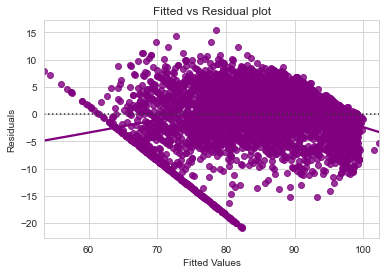

In [77]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [78]:
# columns in training set
X_train_1.columns

Index(['const', 'lread', 'scall', 'rchar', 'wchar', 'pgout', 'atch', 'pflt',
       'freemem', 'freeswap'],
      dtype='object')

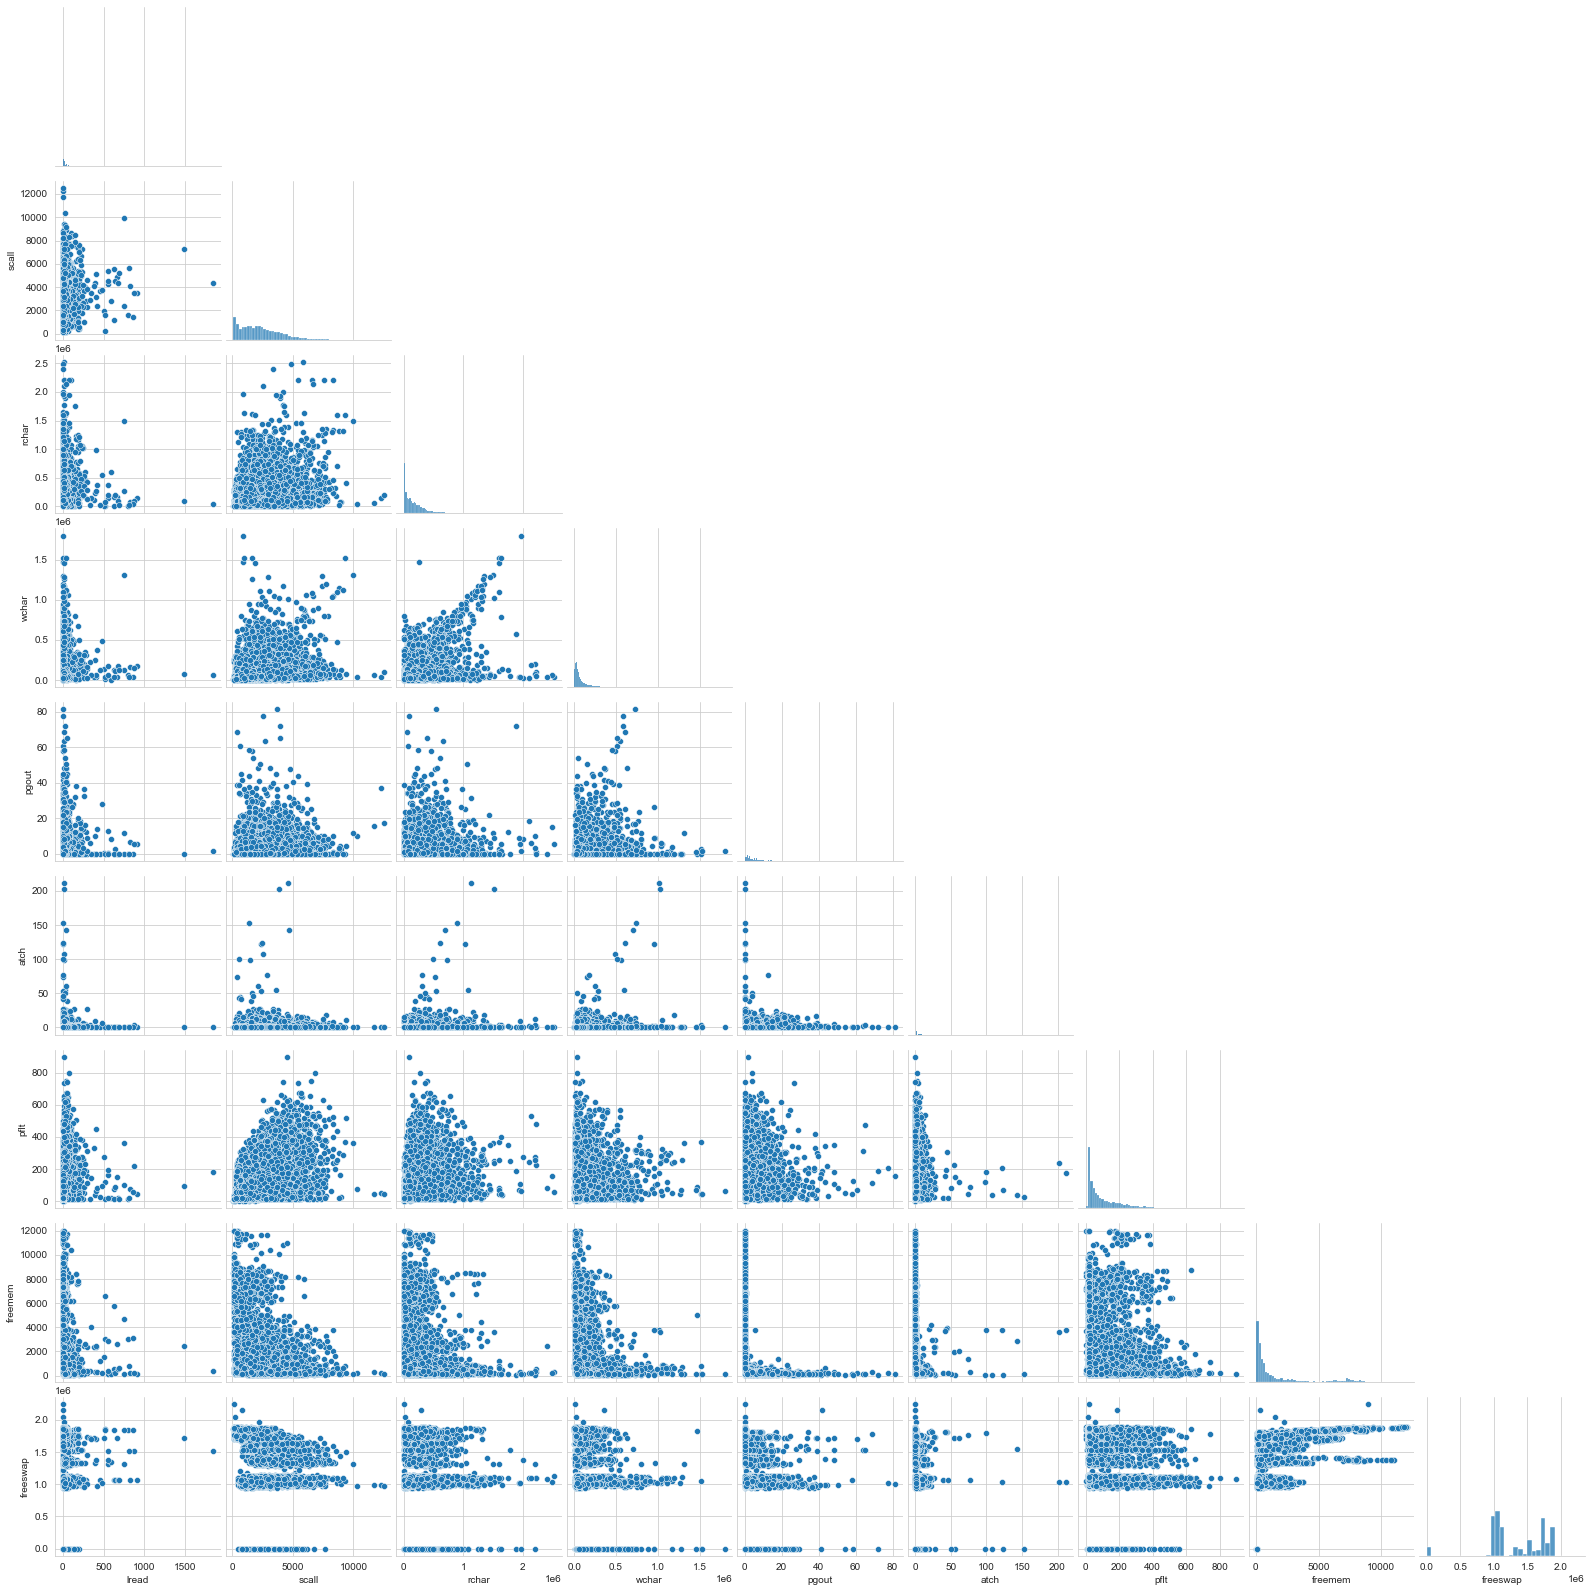

In [79]:
# checking the distribution of variables in training set with dependent variable
sns.pairplot(data[['lread', 'scall', 'rchar', 'wchar', 'pgout', 'atch', 'pflt','freemem', 'freeswap']], corner=True)
plt.show()

In [80]:
# using square transformation
X_train_1[['scall','pflt']] = np.square(X_train_1[['scall','pflt']] )

# let's create a model with the transformed data
olsmod_3 = sm.OLS(Y_train, X_train_1)
olsres_3 = olsmod_3.fit()
print(olsres_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     2300.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:28:14   Log-Likelihood:                -16830.
No. Observations:                5734   AIC:                         3.368e+04
Df Residuals:                    5724   BIC:                         3.375e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.3571      0.275    295.483      0.0

In [81]:
# let us recreate the dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = Y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_3.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_3.resid.values  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
0           91.0      90.699567   0.300433
1           94.0      89.937724   4.062276
2           61.5      73.978937 -12.478937
3           83.0      83.029778  -0.029778
4           94.0      96.239688  -2.239688

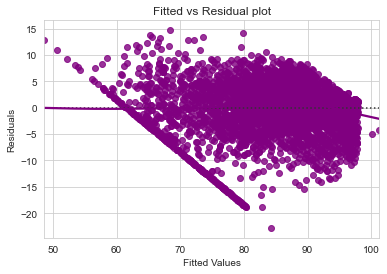

In [82]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

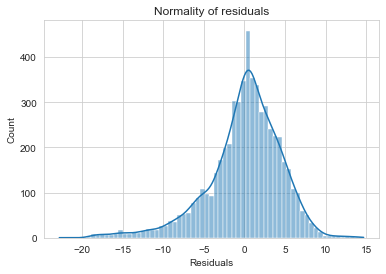

In [83]:
#NORMALITY Testing

sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

In [84]:
#The residual terms are normally distributed.

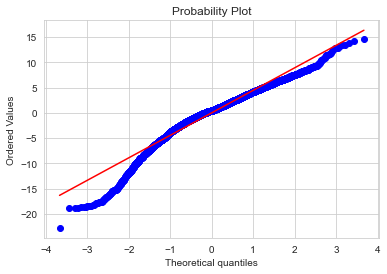

In [85]:
#The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

#### Most of the points are lying on the straight line in QQ plot

The Shapiro-Wilk test can also be used for checking the normality. The null and alternate hypotheses of the test are as follows:

1. Null hypothesis - Data is normally distributed.
2. Alternate hypothesis - Data is not normally distributed.

In [86]:
stats.shapiro(df_pred["Residuals"])

C:\Users\Kiran\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9540950059890747, pvalue=4.14814193097436e-39)

Since p-value < 0.05, the residuals are not normal as per shapiro test.
Strictly speaking - the residuals are not normal. However, as an approximation, we might be willing to accept this distribution as close to being normal

The null and alternate hypotheses of the goldfeldquandt test are as follows:

1. Null hypothesis : Residuals are homoscedastic
2. Alternate hypothesis : Residuals have hetroscedasticity

In [87]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [88]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train_1)
lzip(name, test)

[('F statistic', 1.085381328051855), ('p-value', 0.014292757634768566)]

#### Since p-value > 0.05 we can say that the residuals are homoscedastic.

In [89]:
#All the assumptions of linear regression are now satisfied. Let's check the summary of our final model (olsres_3).

In [90]:
print(olsres_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     2300.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:28:47   Log-Likelihood:                -16830.
No. Observations:                5734   AIC:                         3.368e+04
Df Residuals:                    5724   BIC:                         3.375e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.3571      0.275    295.483      0.0

In [91]:
# model parameters
olsres_3.params

const       8.135707e+01
lread      -5.654312e-02
scall      -1.723278e-07
rchar      -7.938122e-06
wchar      -9.421635e-06
pgout      -3.773285e-01
atch        4.736505e-01
pflt       -1.297965e-04
freemem    -2.902287e-04
freeswap    9.535266e-06
dtype: float64

In [92]:
# Let us write the equation of linear regression
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train_1.columns)):
    if i == 0:
        print(olsres_3.params[i], "+", end=" ")
    elif i != len(X_train_1.columns) - 1:
        print(
            olsres_3.params[i],
            "* (",
            X_train_1.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_3.params[i], "* (", X_train_1.columns[i], ")")

usr = 81.35707237532267 + -0.056543116960659515 * ( lread ) +  -1.723278484920159e-07 * ( scall ) +  -7.938122103793608e-06 * ( rchar ) +  -9.421634547877954e-06 * ( wchar ) +  -0.3773284761121021 * ( pgout ) +  0.47365049070696297 * ( atch ) +  -0.00012979650738554826 * ( pflt ) +  -0.00029022865795560256 * ( freemem ) +  9.535265807228392e-06 * ( freeswap )


# Problem 2 

## Logistic Regression, LDA and CART

In [93]:
Data=pd.read_excel('Contraceptive_method_dataset.xlsx')
Data.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [94]:
Data.tail()

Wife_age Wife_ education Husband_education  No_of_children_born  \
1468      33.0        Tertiary          Tertiary                  NaN   
1469      33.0        Tertiary          Tertiary                  NaN   
1470      39.0       Secondary         Secondary                  NaN   
1471      33.0       Secondary         Secondary                  NaN   
1472      17.0       Secondary         Secondary                  1.0   

     Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
1468   Scientology          Yes                   2                Very High   
1469   Scientology           No                   1                Very High   
1470   Scientology          Yes                   1                Very High   
1471   Scientology          Yes                   2                      Low   
1472   Scientology           No                   2                Very High   

     Media_exposure  Contraceptive_method_used  
1468         Exposed                       Yes  
1469         Exposed                       Yes  
1470         Exposed                       Yes  
1471         Exposed                       Yes  
1472         Exposed                       Yes

In [95]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [96]:
Data.describe()

Wife_age  No_of_children_born  Husband_Occupation
count  1402.000000          1452.000000         1473.000000
mean     32.606277             3.254132            2.137814
std       8.274927             2.365212            0.864857
min      16.000000             0.000000            1.000000
25%      26.000000             1.000000            1.000000
50%      32.000000             3.000000            2.000000
75%      39.000000             4.000000            3.000000
max      49.000000            16.000000            4.000000

In [97]:
Data.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [98]:
#Treating missing values
Data['Wife_age'].fillna(Data['Wife_age'].median(), inplace=True)

In [99]:
Data['No_of_children_born'].fillna(Data['No_of_children_born'].median(), inplace=True)

In [100]:
Data.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

#### Outlier Detection

<AxesSubplot:>

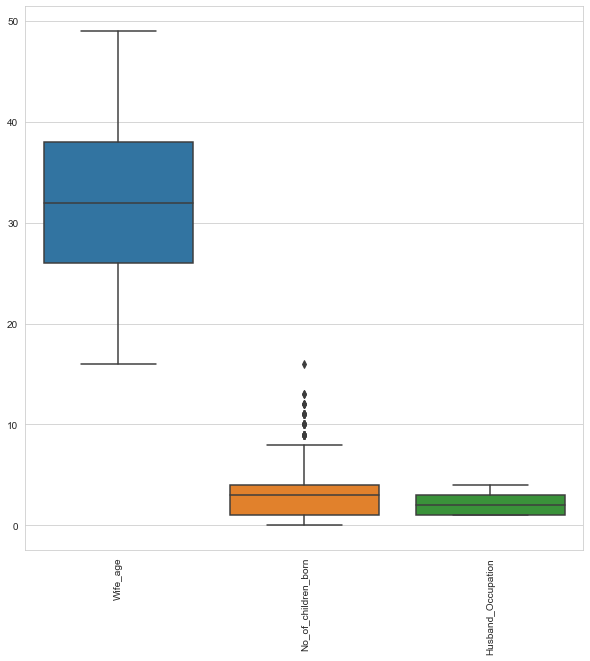

In [101]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.boxplot(data=Data)

#### Treating the outliers

In [102]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [103]:
LR, UR = remove_outlier(Data['No_of_children_born'])
Data['No_of_children_born'] = np.where(Data['No_of_children_born'] > UR, UR, Data['No_of_children_born'])
Data['No_of_children_born'] = np.where(Data['No_of_children_born'] < LR, LR, Data['No_of_children_born'])

<AxesSubplot:>

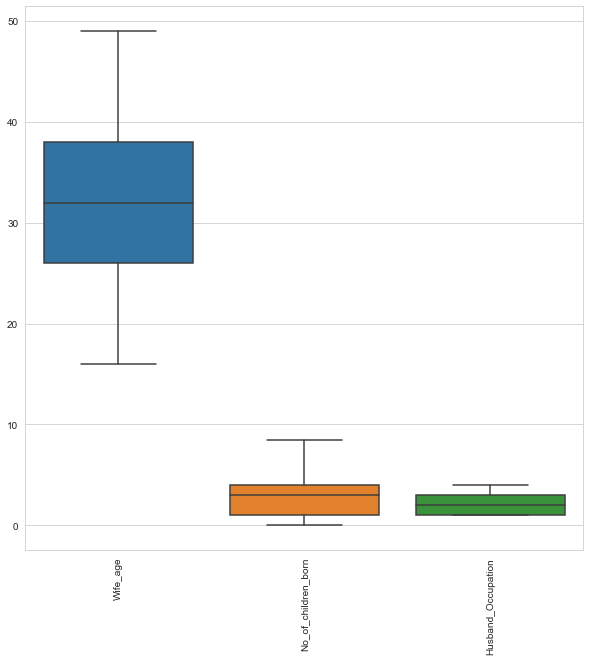

In [104]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.boxplot(data=Data)

Bivariate and Multivariate Analysis to understand the correlation within the variables

<Figure size 1440x720 with 0 Axes>

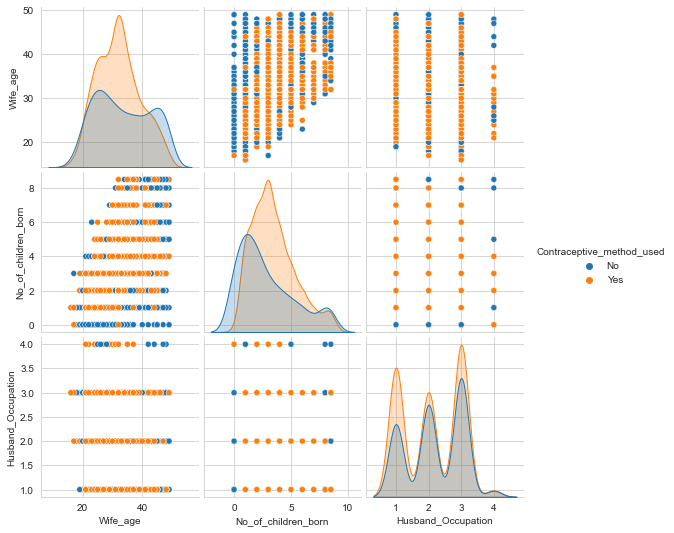

In [105]:
plt.figure(figsize=(20,10))
sns.pairplot(data=Data,hue="Contraceptive_method_used", diag_kind='kde',);

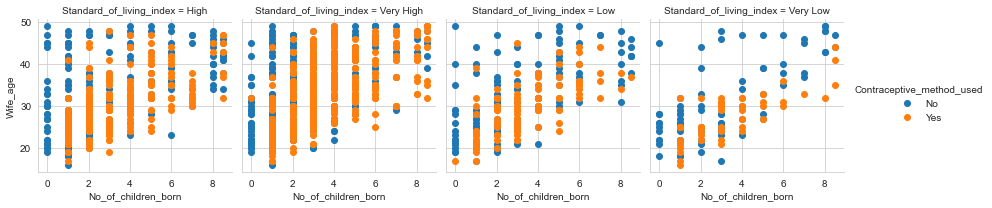

In [106]:
g=sns.FacetGrid(Data, col="Standard_of_living_index", hue="Contraceptive_method_used")
g=g.map(plt.scatter, "No_of_children_born","Wife_age")
g.add_legend()

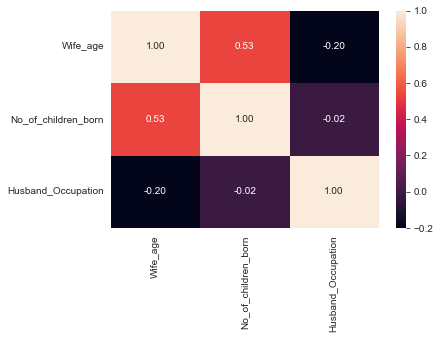

In [107]:
sns.heatmap(Data.corr(), annot=True, fmt='.2f');

#### Importing libraries to perform Logic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [109]:
#Encoding of Data for categorical Columns
from sklearn.preprocessing import OrdinalEncoder

In [110]:
ord_encoder = OrdinalEncoder(categories=[['Very High','High','Low','Very Low']])

In [111]:
ord_encoder.fit(Data[['Standard_of_living_index']])

OrdinalEncoder(categories=[['Very High', 'High', 'Low', 'Very Low']])

In [112]:
Data ['Standard_of_living_index_enc'] = ord_encoder.transform(Data [['Standard_of_living_index']])

In [113]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Wife_age                      1473 non-null   float64
 1   Wife_ education               1473 non-null   object 
 2   Husband_education             1473 non-null   object 
 3   No_of_children_born           1473 non-null   float64
 4   Wife_religion                 1473 non-null   object 
 5   Wife_Working                  1473 non-null   object 
 6   Husband_Occupation            1473 non-null   int64  
 7   Standard_of_living_index      1473 non-null   object 
 8   Media_exposure                1473 non-null   object 
 9   Contraceptive_method_used     1473 non-null   object 
 10  Standard_of_living_index_enc  1473 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 126.7+ KB


In [114]:
ord_encoder = OrdinalEncoder(categories=[['Yes',"No"]])
ord_encoder.fit(Data[['Wife_Working']])
Data ['Wife_Working_enc'] = ord_encoder.transform(Data [['Wife_Working']])

In [115]:
ord_encoder = OrdinalEncoder(categories=[['Primary',"Secondary","Tertiary","Uneducated"]])
ord_encoder.fit(Data[['Wife_ education']])
Data ['Wife_ education_enc'] = ord_encoder.transform(Data [['Wife_ education']])

In [116]:
ord_encoder = OrdinalEncoder(categories=[['Primary',"Secondary","Tertiary","Uneducated"]])
ord_encoder.fit(Data[['Husband_education']])
Data ['Husband_education_enc'] = ord_encoder.transform(Data [['Husband_education']])

In [117]:
ord_encoder = OrdinalEncoder(categories=[['Scientology',"Non-Scientology"]])
ord_encoder.fit(Data[['Wife_religion']])
Data ['Wife_religion_enc'] = ord_encoder.transform(Data [['Wife_religion']])

In [118]:
ord_encoder = OrdinalEncoder(categories=[['Yes',"No"]])
ord_encoder.fit(Data[['Contraceptive_method_used']])
Data ['Contraceptive_method_used_enc'] = ord_encoder.transform(Data [['Contraceptive_method_used']])

In [119]:
ord_encoder = OrdinalEncoder(categories =[["Exposed", "Not-Exposed"]])
ord_encoder.fit(Data[['Media_exposure ']])
Data['Media_exposure_enc']=ord_encoder.transform(Data[['Media_exposure ']])

In [120]:
Data.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                  8.5   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  8.5   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  Standard_of_living_index_enc  \
0         Exposed                        No                           1.0   
1         Exposed                        No                           0.0   
2         Exposed                        No                           0.0   
3         Exposed                        No                           1.0   
4         Exposed                        No                           2.0   

   Wife_Working_enc  Wife_ education_enc  Husband_education_enc  \
0               1.0                  0.0                    1.0   
1               1.0                  3.0                    1.0   
2               1.0                  0.0                    1.0   
3               1.0                  1.0                    0.0   
4               1.0                  1.0                    1.0   

   Wife_religion_enc  Contraceptive_method_used_enc  Media_exposure_enc  
0                0.0                            1.0                 0.0  
1                0.0                            1.0                 0.0  
2                0.0                            1.0                 0.0  
3                0.0                            1.0                 0.0  
4                0.0                            1.0                 0.0

Now in a new DataFrame, we will drop all the object values and retain the encoded columns for the ease of model. And also make them as categorical values.

In [121]:
Data.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used', 'Standard_of_living_index_enc',
       'Wife_Working_enc', 'Wife_ education_enc', 'Husband_education_enc',
       'Wife_religion_enc', 'Contraceptive_method_used_enc',
       'Media_exposure_enc'],
      dtype='object')

In [122]:
Df_new=pd.DataFrame()
Df_new=Data.drop(['Wife_ education', 'Husband_education', 'Wife_religion', 'Wife_Working', 'Standard_of_living_index', 'Media_exposure ','Contraceptive_method_used',], axis=1)
Df_new.head()

Wife_age  No_of_children_born  Husband_Occupation  \
0      24.0                  3.0                   2   
1      45.0                  8.5                   3   
2      43.0                  7.0                   3   
3      42.0                  8.5                   3   
4      36.0                  8.0                   3   

   Standard_of_living_index_enc  Wife_Working_enc  Wife_ education_enc  \
0                           1.0               1.0                  0.0   
1                           0.0               1.0                  3.0   
2                           0.0               1.0                  0.0   
3                           1.0               1.0                  1.0   
4                           2.0               1.0                  1.0   

   Husband_education_enc  Wife_religion_enc  Contraceptive_method_used_enc  \
0                    1.0                0.0                            1.0   
1                    1.0                0.0                            1.0   
2                    1.0                0.0                            1.0   
3                    0.0                0.0                            1.0   
4                    1.0                0.0                            1.0   

   Media_exposure_enc  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [123]:
Df_new.columns

Index(['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Standard_of_living_index_enc', 'Wife_Working_enc',
       'Wife_ education_enc', 'Husband_education_enc', 'Wife_religion_enc',
       'Contraceptive_method_used_enc', 'Media_exposure_enc'],
      dtype='object')

In [124]:
Df_new[['Husband_Occupation','Standard_of_living_index_enc', 'Wife_Working_enc','Wife_ education_enc', 'Husband_education_enc', 'Wife_religion_enc','Contraceptive_method_used_enc', 'Media_exposure_enc']]=Df_new[['Husband_Occupation','Standard_of_living_index_enc', 'Wife_Working_enc','Wife_ education_enc', 'Husband_education_enc', 'Wife_religion_enc','Contraceptive_method_used_enc', 'Media_exposure_enc']]. apply(lambda x: x. astype('category'))

In [125]:
#The new dataset is now ready with re-arranged, encoded columns and correct Data types
Df_new = Df_new[ [ 'Wife_age', 'No_of_children_born', 'Husband_Occupation','Standard_of_living_index_enc', 'Wife_Working_enc','Wife_ education_enc', 'Husband_education_enc', 'Wife_religion_enc','Media_exposure_enc','Contraceptive_method_used_enc'] ]
Df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Wife_age                       1473 non-null   float64 
 1   No_of_children_born            1473 non-null   float64 
 2   Husband_Occupation             1473 non-null   category
 3   Standard_of_living_index_enc   1473 non-null   category
 4   Wife_Working_enc               1473 non-null   category
 5   Wife_ education_enc            1473 non-null   category
 6   Husband_education_enc          1473 non-null   category
 7   Wife_religion_enc              1473 non-null   category
 8   Media_exposure_enc             1473 non-null   category
 9   Contraceptive_method_used_enc  1473 non-null   category
dtypes: category(8), float64(2)
memory usage: 35.9 KB


#### Logistic Regression

In [126]:
array = Df_new.values
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for Contraceptive
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

In [127]:
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.9253393665158371
[[408   4]
 [ 29   1]]
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       412
         1.0       0.20      0.03      0.06        30

    accuracy                           0.93       442
   macro avg       0.57      0.51      0.51       442
weighted avg       0.88      0.93      0.90       442



C:\Users\Kiran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


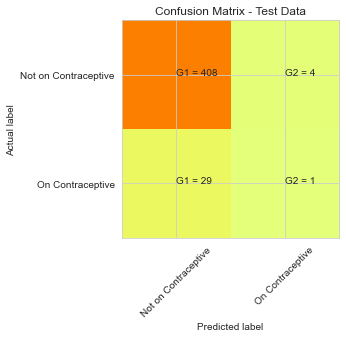

In [128]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Not on Contraceptive', 'On Contraceptive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [129]:
#To Claculate some of the metrics based on the understanding of the above confusion matrix
import numpy
from sklearn import metrics

#### Linear Discriminant Analysis (LDA)

In [132]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

Find the Distribution of Dependent Variable Categories

In [133]:
count_no_sub = len(Df_new[Df_new['Contraceptive_method_used_enc']==1])
count_sub = len(Df_new[Df_new['Contraceptive_method_used_enc']==0])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of Not on Contraceptive is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of On Contraceptive", pct_of_sub*100)

percentage of Not on Contraceptive is 42.701968771215206
percentage of On Contraceptive 57.298031228784794


In [134]:
#Renaming Columns for ease
Df_new.rename(columns = {'Contraceptive_method_used_enc':'ContraceptiveUsed'}, inplace = True) 
Df_new.rename(columns = {'Media_exposure_enc':'MediaExposure'}, inplace = True) 
Df_new.rename(columns = {'Wife_religion_enc':'WifeReligion'}, inplace = True) 
Df_new.rename(columns = {'Husband_education_enc':'HusbandEducation'}, inplace = True) 
Df_new.rename(columns = {'Wife_ education_enc':'WifeEducation'}, inplace = True) 
Df_new.rename(columns = {'Wife_Working_enc':'WifeWorking'}, inplace = True)
Df_new.rename(columns = {'Standard_of_living_index_enc':'StandardOfLivingIndex'}, inplace = True)
Df_new.rename(columns = {'Husband_Occupation':'HusbandOccupation'}, inplace = True)
Df_new.rename(columns = {'No_of_children_born':'ChildrenBorn'}, inplace = True)
Df_new.rename(columns = {'Wife_age':'WifeAge'}, inplace = True)
Df_new.columns

Index(['WifeAge', 'ChildrenBorn', 'HusbandOccupation', 'StandardOfLivingIndex',
       'WifeWorking', 'WifeEducation', 'HusbandEducation', 'WifeReligion',
       'MediaExposure', 'ContraceptiveUsed'],
      dtype='object')

In [135]:
X = Df_new.drop(['ContraceptiveUsed'],axis=1)
Y = Df_new['ContraceptiveUsed']

In [136]:
Y.value_counts()
#Here 0 is on contraceptive and 1 is not on contraceptive

0.0    844
1.0    629
Name: ContraceptiveUsed, dtype: int64

In [137]:
#Building a LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,Y)
model

LinearDiscriminantAnalysis()

In [138]:
# Predict it
pred_class = model.predict(X)
Df_new['Prediction'] = pred_class 

In [139]:
confusion_matrix(Y, pred_class)

array([[690, 154],
       [330, 299]], dtype=int64)

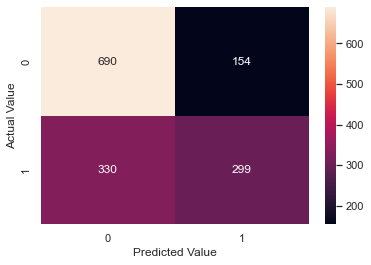

In [140]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Y, pred_class),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

1020 rows classified as 0 (On Contraceptive) and 453 rows classified as 1 (Not On Contraceptive)

In [141]:
from sklearn.metrics import classification_report
print(classification_report(Y, pred_class))

              precision    recall  f1-score   support

         0.0       0.68      0.82      0.74       844
         1.0       0.66      0.48      0.55       629

    accuracy                           0.67      1473
   macro avg       0.67      0.65      0.65      1473
weighted avg       0.67      0.67      0.66      1473



In [142]:
X.shape

(1473, 9)

In [143]:
model.coef_

array([[ 0.08778769, -0.33817804,  0.07923715,  0.32977892, -0.09758563,
        -0.17989079, -0.13346181, -0.57494048,  0.98568596]])

In [144]:
model.intercept_

array([-2.03121967])

#### LDF for the abova case would be:

LDF=-2.031+ X1*(0.087) + X2*(-0.338) + X3*(0.079) + X4*(0.329) + X5*(-0.097) + X6*(-0.179) + X7*(-0.133) + X8*(-0.574) + X9*0.985

#### So from the above equation the following things can be summarized as
1. the coeff of X9 predictor is largest in magnitude thus it helps in discriminating the target the best
2. the coeff of X5 predictor is smallest in magnitude thus it helps in discriminating the target the least.
3. all the DS can be computed for each row using the above f(x) which will aid in classification

### CART Analysis

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [146]:
# capture the target column ("ContraceptiveUsed") into separate vectors for training set and test set

X = Df_new.drop("ContraceptiveUsed" , axis=1)

y = Df_new.pop("ContraceptiveUsed")

In [147]:
# splitting data into training and test set for independent attributes (70:30)
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [148]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [149]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [150]:
from sklearn import tree

train_char_label = ['On Contraceptive', 'Not On Contraceptive']
Contraceptive_Tree_File = open('d:\Contraceptive_Tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Contraceptive_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Contraceptive_Tree_File.close()

In [151]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                            Imp
WifeAge                0.287275
ChildrenBorn           0.195169
HusbandOccupation      0.084365
StandardOfLivingIndex  0.105801
WifeWorking            0.061185
WifeEducation          0.096863
HusbandEducation       0.064870
WifeReligion           0.029832
MediaExposure          0.009511
Prediction             0.065129


In [152]:
y_predict = dt_model.predict(X_test)

In [153]:
# Regularising the Decision Tree
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [154]:
Contraceptive_Tree_regularized = open('d:\Contraceptive_Tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= Contraceptive_Tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

Contraceptive_Tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                            Imp
WifeAge                0.287275
ChildrenBorn           0.195169
HusbandOccupation      0.084365
StandardOfLivingIndex  0.105801
WifeWorking            0.061185
WifeEducation          0.096863
HusbandEducation       0.064870
WifeReligion           0.029832
MediaExposure          0.009511
Prediction             0.065129


In [155]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

AUC: 0.801


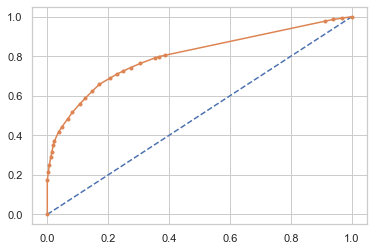

In [156]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.759


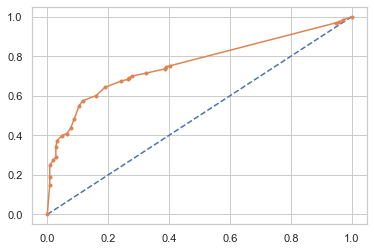

In [157]:
# AUC and ROC for the testing data

# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [158]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       595
         1.0       0.74      0.66      0.70       436

    accuracy                           0.76      1031
   macro avg       0.75      0.74      0.75      1031
weighted avg       0.76      0.76      0.75      1031



In [159]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.75      0.81      0.78       249
         1.0       0.73      0.64      0.68       193

    accuracy                           0.74       442
   macro avg       0.74      0.73      0.73       442
weighted avg       0.74      0.74      0.74       442



In [160]:
confusion_matrix(train_labels, ytrain_predict)

array([[493, 102],
       [149, 287]], dtype=int64)

In [161]:
confusion_matrix(test_labels, ytest_predict)

array([[202,  47],
       [ 69, 124]], dtype=int64)

In [162]:
reg_dt_model.score(X_train,train_labels)

0.7565470417070805

In [163]:
reg_dt_model.score(X_test,test_labels)

0.7375565610859729